In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


Data:

The data used in this project is from an anonymous organisation’s social media ad campaign.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

Aim:

To optimize Sales conversion by comparing the campaigns run by XYZ company.
To perform cluster analysis on the ad campaigns and profile the clusters to find the best performing cluster






In [2]:
df=pd.read_csv("/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv")

Exploratory Data Analysis

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.shape

(1143, 11)

In [5]:
df.info()
# no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
df.describe()


,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
df.describe(include=['object'])

,age,gender
count,1143,1143
unique,4,2
top,30-34,M
freq,426,592


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.corr()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


Visualizing the correlation data ( including only the quantitative variables)

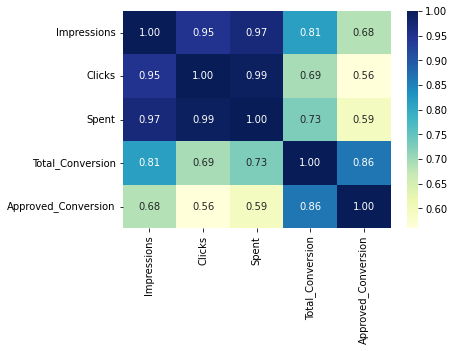

In [10]:
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="YlGnBu")

* impressions and clicks are high corr,
* impression and spent are high corr,
* impression and total_conversion are high corr,
* impression and approved_conv are moderately correlated,
* clicks and spent are high corr,
* clicks and total conv and approved conv are medium correlated,
* spent and total_conv and spent are moderately correlated,
* spent and approved conv are moderately correlated,
* total conv and approved conversion are highly correlated.

 
The more the ad is shown the higher the total conv and approved conv

In [11]:
# 3 unique campaigns run by xyz company
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

https://datatofish.com/replace-values-pandas-dataframe/---good link for replace functionality

In [12]:
# renaming the campaigns for analysis purpose
df['xyz_campaign_id'].replace({916:'campaign_1',936:'campaign_2',1178:'campaign_3'}, inplace=True)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_1,103928,30-34,M,28,4133,1,1.29,1,1


In [13]:
print("number_of_fb_campaigns:",df['fb_campaign_id'].nunique())
# number of FB campaigns

print("number_of_ads:",df['ad_id'].nunique())

number_of_fb_campaigns: 691
number_of_ads: 1143


EDA for the 3 campaigns run by the XYZ company

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='count'>

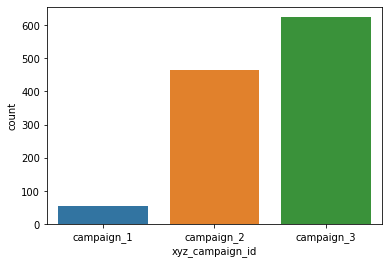

In [14]:
sns.countplot(x='xyz_campaign_id', data=df)
# we can see that maximum adds were shown to campaign_3

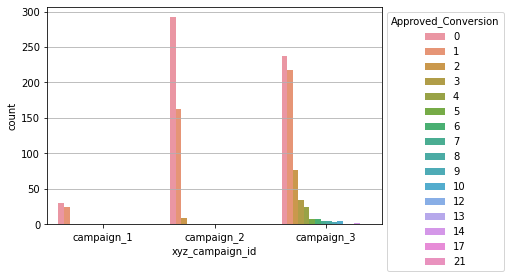

In [15]:
ax=sns.countplot(x ='xyz_campaign_id',hue="Approved_Conversion", data = df) 
plt.grid(axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# campaign_3 has maximum approved conversions


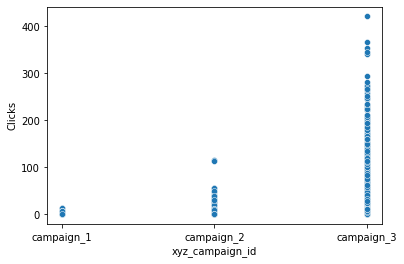

In [16]:
ax=sns.scatterplot(x ='xyz_campaign_id',y="Clicks", data = df) 
# campaign_3 clicks are more

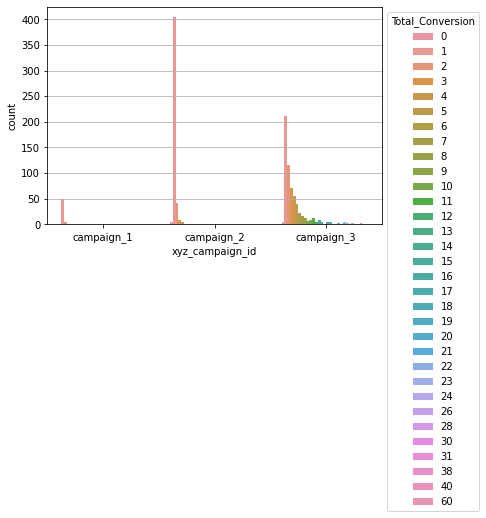

In [17]:
ax=sns.countplot(x ='xyz_campaign_id',hue="Total_Conversion", data = df) 
plt.grid(axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

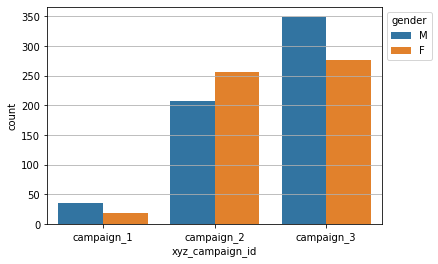

In [18]:
ax=sns.countplot(x ='xyz_campaign_id',hue="gender", data = df) 
plt.grid(axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# distribution of gender over campaigns not same

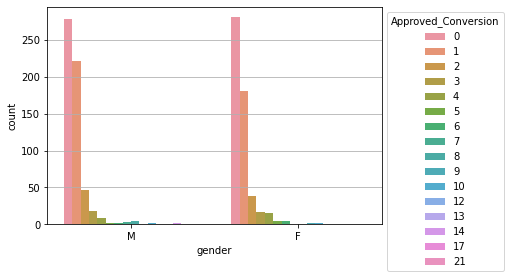

In [19]:
ax=sns.countplot(hue ='Approved_Conversion',x="gender", data = df) 
plt.grid(axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Males convert more than females

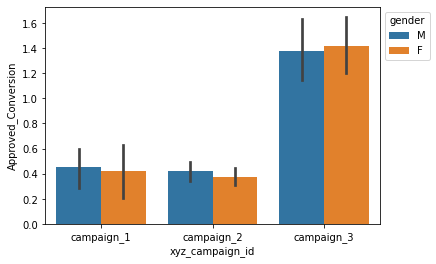

In [20]:
ax=sns.barplot(x ='xyz_campaign_id',y='Approved_Conversion',hue='gender', data = df) 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# unlike campaign 1 and campaign 2 , campaign 3 has more females with conversions

distribution of conversions with campaigns over age

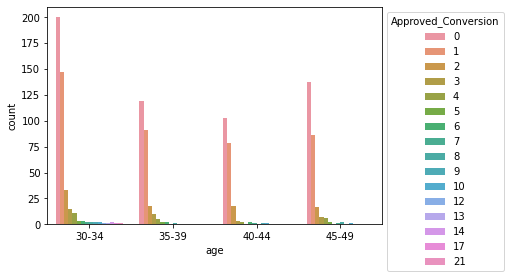

In [21]:
ax=sns.countplot(x='age',hue='Approved_Conversion', data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# maximum users are in 30-34 age bracket and also maximum conversions are from same age group

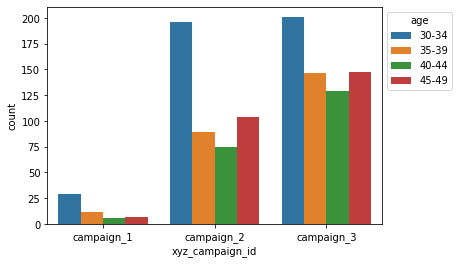

In [22]:
ax=sns.countplot(x='xyz_campaign_id',hue='age', data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# maximum users are in 30-34 age, 45-49 age  bracket and also maximum conversions are from same age group
# maximum people /ads were in campaign 3 and so maximum conversions in 30-34 age bracket

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

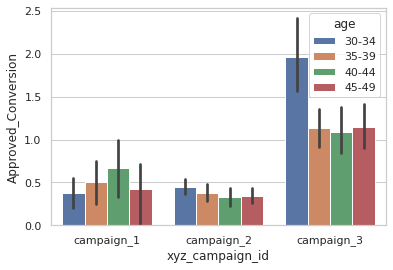

In [23]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)

# distribution of conversions in each campaign by age
# campaign_1 has most conversions for age group 40-44 and least for 30-34. 

#In other 2 campaigns it is reverse trend. Maximum for 30-34 and minimum for 40-44.


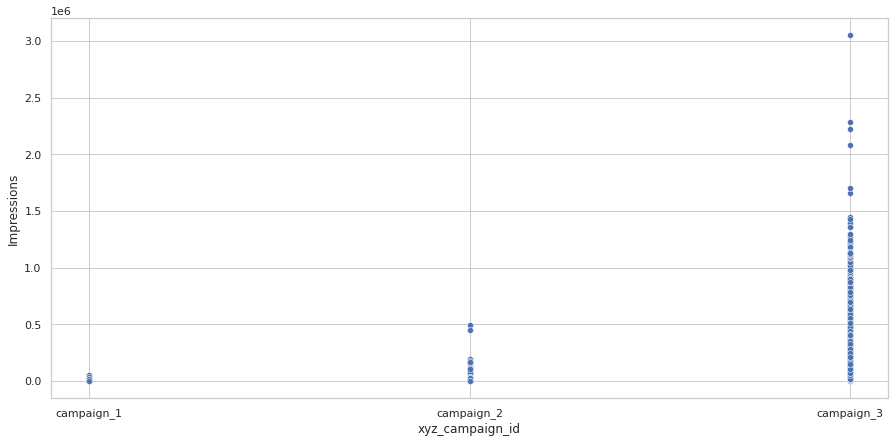

In [24]:
fig=plt.figure(figsize=(15,7))

sns.scatterplot(y='Impressions',x='xyz_campaign_id', data=df)


plt.show()

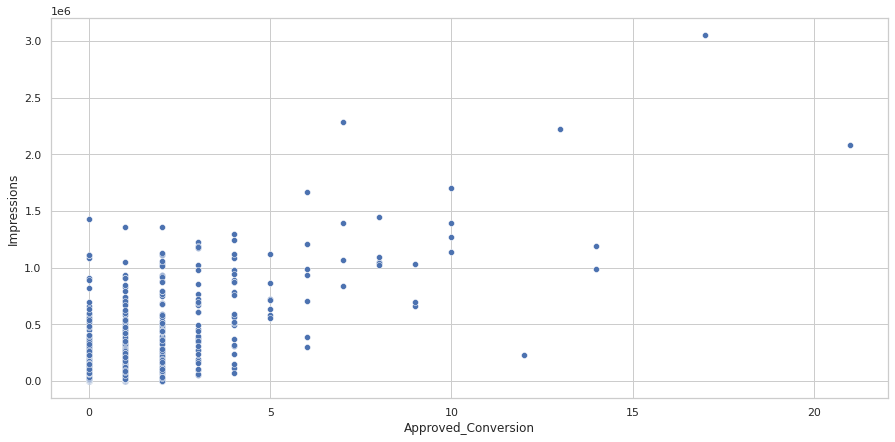

In [25]:
fig=plt.figure(figsize=(15,7))

sns.scatterplot(y='Impressions',x='Approved_Conversion', data=df)


plt.show()

higher Impressions drive higher conversions

In [26]:
df['Clicks'].groupby(by=df['xyz_campaign_id']).sum()

xyz_campaign_id
campaign_1      113
campaign_2     1984
campaign_3    36068
Name: Clicks, dtype: int64

In [27]:
df['Approved_Conversion'].groupby(by=df['xyz_campaign_id']).sum()

xyz_campaign_id
campaign_1     24
campaign_2    183
campaign_3    872
Name: Approved_Conversion, dtype: int64

In [28]:
df['Total_Conversion'].groupby(by=df['xyz_campaign_id']).sum()

xyz_campaign_id
campaign_1      58
campaign_2     537
campaign_3    2669
Name: Total_Conversion, dtype: int64

In [29]:
df['ad_id'].groupby(by=df['xyz_campaign_id']).count()

xyz_campaign_id
campaign_1     54
campaign_2    464
campaign_3    625
Name: ad_id, dtype: int64

In [30]:
df['Impressions'].groupby(by=df['xyz_campaign_id']).sum()

xyz_campaign_id
campaign_1       482925
campaign_2      8128187
campaign_3    204823716
Name: Impressions, dtype: int64

In [31]:
df['interest'].unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106])

In [32]:
df['interest'].where(df['xyz_campaign_id']=='campaign_3').value_counts()

16.0     38
10.0     35
29.0     35
27.0     26
63.0     26
28.0     26
64.0     24
20.0     24
19.0     23
22.0     22
21.0     22
32.0     21
18.0     20
15.0     20
25.0     19
2.0      18
26.0     18
23.0     17
24.0     16
30.0     16
31.0     15
7.0      14
36.0     13
65.0     11
66.0     11
107.0     8
110.0     8
102.0     7
105.0     7
101.0     7
112.0     7
108.0     7
100.0     6
111.0     6
113.0     6
109.0     6
103.0     5
114.0     5
104.0     5
106.0     5
Name: interest, dtype: int64

In [33]:
df['interest'].where(df['xyz_campaign_id']=='campaign_2').value_counts()

16.0    86
10.0    48
29.0    39
27.0    31
64.0    24
26.0    23
20.0    22
15.0    22
18.0    22
28.0    21
63.0    18
21.0    13
22.0    11
32.0    11
36.0     8
19.0     8
31.0     8
7.0      8
30.0     8
2.0      7
24.0     7
65.0     7
23.0     6
25.0     6
Name: interest, dtype: int64

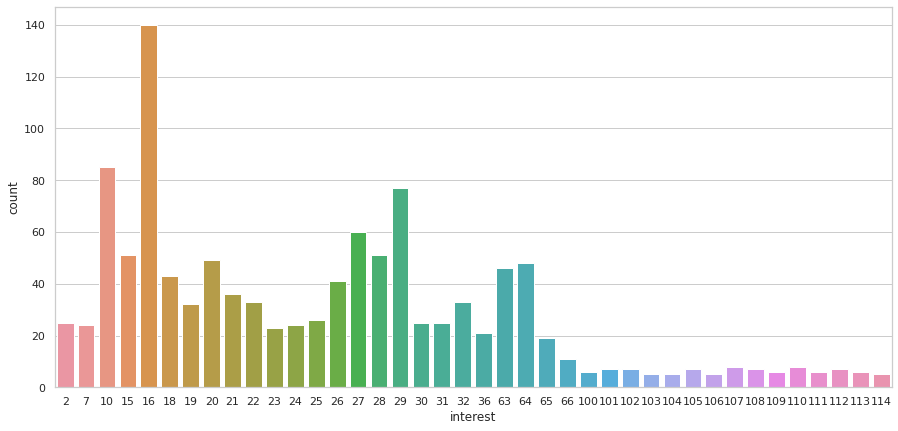

In [34]:
fig=plt.figure(figsize=(15,7))

sns.countplot(x='interest', data=df)


plt.show()

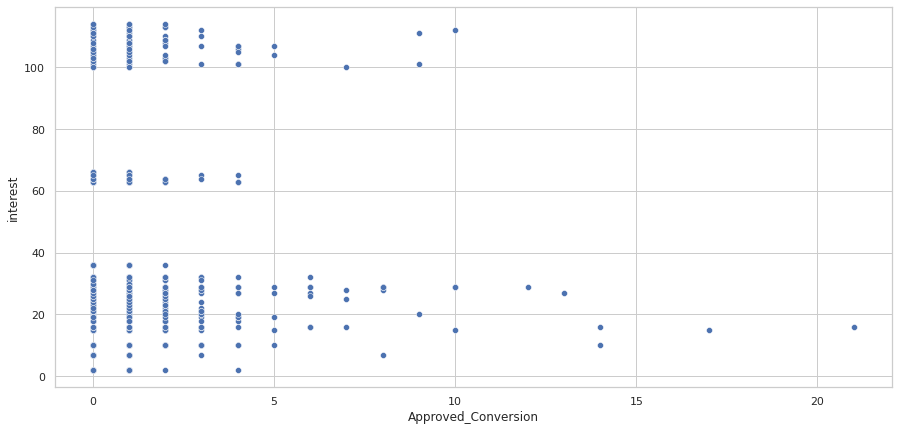

In [35]:
fig=plt.figure(figsize=(15,7))

sns.scatterplot(y='interest',x='Approved_Conversion', data=df)


plt.show()

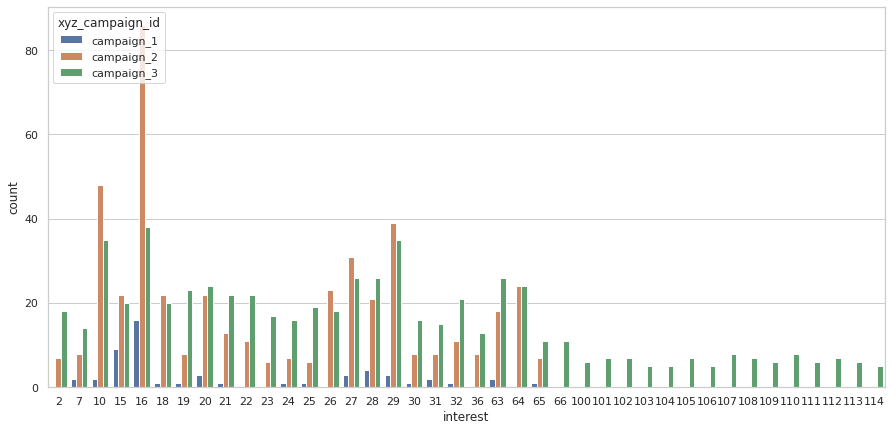

In [36]:
fig=plt.figure(figsize=(15,7))

sns.countplot(x='interest',hue='xyz_campaign_id', data=df)


plt.show()


Though there are more add campaigns with interest code ranging between 2-66 , there are still many conversions for ads with interest code beyond 66 code.
When we compare the xyz campaign_3 with xyz campaign_2 we can see that campaign_3 has many adds with interests beyond code 66 and perhaps that is what is driving the higher conversions as well.

In [37]:
(df['Impressions'].groupby(df['interest']).sum()/df['Impressions'].sum())*100
# percentage ad impression for each interest. For interest code 16 it is dispproportinately high. interest code 29 has 8 % impressions but 
#delivers 12 % conversions. The impressions should be increased for other ads with interest code that are giving high conversions. Redistribute
#the impressions based on the conversions.

interest
2       0.809449
7       1.224186
10      8.428729
15      5.034725
16     14.903624
18      4.051114
19      2.850152
20      3.232793
21      1.327488
22      1.857898
23      0.860388
24      1.057407
25      2.460573
26      2.281089
27      7.661602
28      5.134977
29      8.793622
30      1.026441
31      0.503813
32      3.024465
36      0.432417
63      3.919529
64      2.382676
65      0.814088
66      0.418585
100     0.948154
101     1.387052
102     0.543938
103     0.900065
104     0.661612
105     1.244572
106     0.746097
107     2.099990
108     1.294730
109     1.396382
110     1.140732
111     0.698525
112     1.089125
113     0.857669
114     0.499527
Name: Impressions, dtype: float64

In [38]:
(df["Approved_Conversion"].groupby(df['interest']).sum()/df["Approved_Conversion"].sum())*100

interest
2       1.760890
7       1.760890
10      8.433735
15      5.838740
16     13.067655
18      3.058387
19      3.058387
20      4.355885
21      2.502317
22      1.112141
23      0.648749
24      1.390176
25      1.760890
26      2.131603
27      5.004634
28      3.892493
29     12.233550
30      1.112141
31      1.482854
32      3.243744
36      0.926784
63      3.151066
64      2.502317
65      1.760890
66      0.370714
100     0.834106
101     2.316960
102     0.648749
103     0.463392
104     0.741427
105     0.556070
106     0.463392
107     1.853568
108     0.648749
109     0.741427
110     0.834106
111     0.926784
112     1.390176
113     0.648749
114     0.370714
Name: Approved_Conversion, dtype: float64

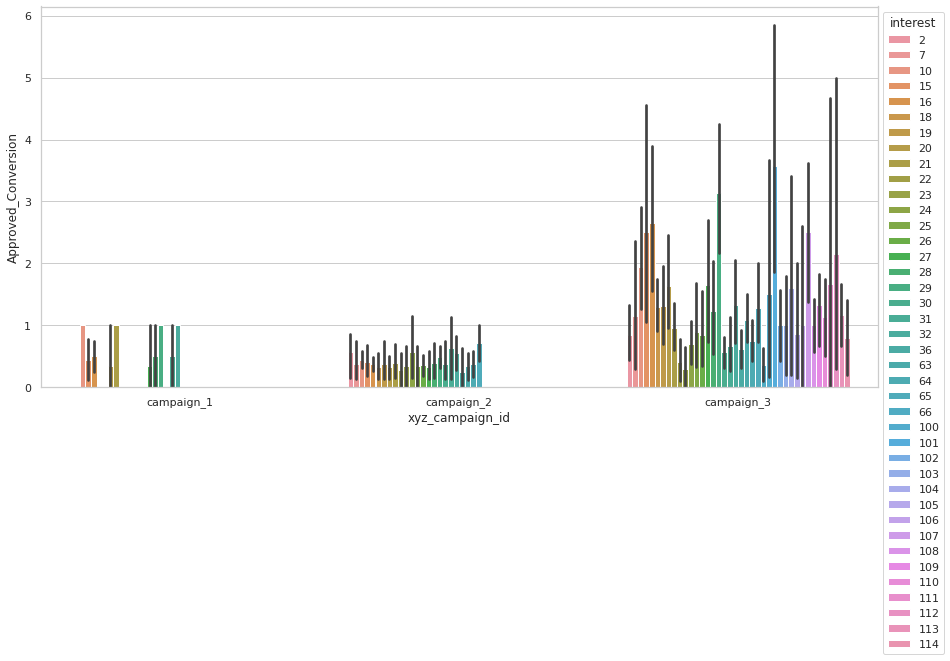

In [39]:
fig=plt.figure(figsize=(15,7))

ax=sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["interest"], data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [40]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_1,103928,30-34,M,28,4133,1,1.29,1,1


In [41]:
df[(df['xyz_campaign_id']== 'campaign_2') & (df['Approved_Conversion']>0)]['Approved_Conversion'].groupby(df['interest']).sum()


interest
2      4
7      3
10    21
15     9
16    32
18     7
19     3
20     7
21     5
22     3
23     2
24     4
25     2
26     8
27    10
28     8
29    19
30     3
31     5
32     6
36     2
63     6
64     9
65     5
Name: Approved_Conversion, dtype: int64

In [42]:
df[(df['xyz_campaign_id']== 'campaign_2') & (df['Approved_Conversion']>0) & (df['interest']== 16)].groupby(['interest','gender'])['Approved_Conversion'].sum()


interest  gender
16        F         20
          M         12
Name: Approved_Conversion, dtype: int64

In [43]:
df[(df['xyz_campaign_id']== 'campaign_2') & (df['Approved_Conversion']>0) & (df['interest']== 29)].groupby(['interest','gender'])['Approved_Conversion'].sum()


interest  gender
29        F         10
          M          9
Name: Approved_Conversion, dtype: int64

In [44]:
df[(df['xyz_campaign_id']== 'campaign_2') & (df['Approved_Conversion']>0) & (df['interest']== 16)].groupby(['interest','age'])['Approved_Conversion'].sum()


interest  age  
16        30-34    12
          35-39     7
          40-44     5
          45-49     8
Name: Approved_Conversion, dtype: int64

In [45]:
df[(df['xyz_campaign_id']== 'campaign_2') & (df['Approved_Conversion']>0) & (df['interest']== 29)].groupby(['interest','age'])['Approved_Conversion'].sum()


interest  age  
29        30-34    7
          35-39    7
          40-44    2
          45-49    3
Name: Approved_Conversion, dtype: int64

In [46]:
df[(df['xyz_campaign_id']== 'campaign_1') & (df['Approved_Conversion']>0)].groupby(df['interest'])['Approved_Conversion'].sum()

interest
10    2
15    4
16    8
20    1
21    1
27    1
28    2
29    3
31    1
32    1
Name: Approved_Conversion, dtype: int64

In [47]:
df[(df['xyz_campaign_id']== 'campaign_1')].groupby(['Approved_Conversion'])['ad_id'].count()

Approved_Conversion
0    30
1    24
Name: ad_id, dtype: int64

In [48]:
df[(df['xyz_campaign_id']== 'campaign_1') & (df['Approved_Conversion']>0) & (df['interest']== 16)].groupby(['interest','gender'])['Approved_Conversion'].sum()


interest  gender
16        F         2
          M         6
Name: Approved_Conversion, dtype: int64

In [49]:
df[(df['xyz_campaign_id']== 'campaign_1') & (df['Approved_Conversion']>0) & (df['interest']== 16)].groupby(['interest','age'])['Approved_Conversion'].sum()


interest  age  
16        30-34    3
          35-39    3
          40-44    2
Name: Approved_Conversion, dtype: int64

Notes: https://sparkbyexamples.com/pandas/pandas-groupby-multiple-columns/

In [50]:
df[(df['xyz_campaign_id']== 'campaign_3') & (df['Approved_Conversion']>0)]['Approved_Conversion'].groupby(df['interest']).sum()

interest
2       15
7       16
10      68
15      50
16     101
18      26
19      30
20      39
21      21
22       9
23       5
24      11
25      17
26      15
27      43
28      32
29     110
30       9
31      10
32      28
36       8
63      28
64      18
65      14
66       4
100      9
101     25
102      7
103      5
104      8
105      6
106      5
107     20
108      7
109      8
110      9
111     10
112     15
113      7
114      4
Name: Approved_Conversion, dtype: int64

In [51]:
df[(df['xyz_campaign_id']== 'campaign_3') & (df['Approved_Conversion']>0) & (df['interest']==16)].groupby(['interest','age'])['Approved_Conversion'].sum()


interest  age  
16        30-34    45
          35-39    21
          40-44    18
          45-49    17
Name: Approved_Conversion, dtype: int64

In [52]:
df[(df['xyz_campaign_id']== 'campaign_3') & (df['Approved_Conversion']>0) & (df['interest']==29)].groupby(['interest','age'])['Approved_Conversion'].sum()


interest  age  
29        30-34    46
          35-39    22
          40-44     8
          45-49    34
Name: Approved_Conversion, dtype: int64

In [53]:
df[(df['xyz_campaign_id']== 'campaign_3') & (df['Approved_Conversion']>0) & (df['interest']== 16)].groupby(['interest','gender'])['Approved_Conversion'].sum()


interest  gender
16        F         30
          M         71
Name: Approved_Conversion, dtype: int64

In [54]:
df[(df['xyz_campaign_id']== 'campaign_3') & (df['Approved_Conversion']>0) & (df['interest']== 29)].groupby(['interest','gender'])['Approved_Conversion'].sum()


interest  gender
29        F         43
          M         67
Name: Approved_Conversion, dtype: int64

In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   object 
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 98.4+ KB


In [56]:
#df['Impressions'].nunique()
x=list(df['Impressions'].sort_values().tail())
print(x)

[1705246, 2080666, 2223278, 2286228, 3052003]


In [57]:
#for i in x:
df2=df.where(df['Impressions']>=1705246)
    

In [58]:
df2.dropna()
# campaign_3 gets maximum/high impressions driving approved conversions

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
525,1121100.0,campaign_3,144532.0,30-34,M,15.0,3052003.0,340.0,639.949998,60.0,17.0
528,1121104.0,campaign_3,144533.0,30-34,M,16.0,2080666.0,202.0,360.150001,40.0,21.0
765,1121601.0,campaign_3,144624.0,45-49,M,16.0,2286228.0,353.0,603.380002,16.0,7.0
860,1121814.0,campaign_3,144659.0,30-34,F,27.0,2223278.0,421.0,612.300003,38.0,13.0
867,1121824.0,campaign_3,144661.0,30-34,F,29.0,1705246.0,295.0,429.479998,23.0,10.0


<AxesSubplot:xlabel='Spent', ylabel='xyz_campaign_id'>

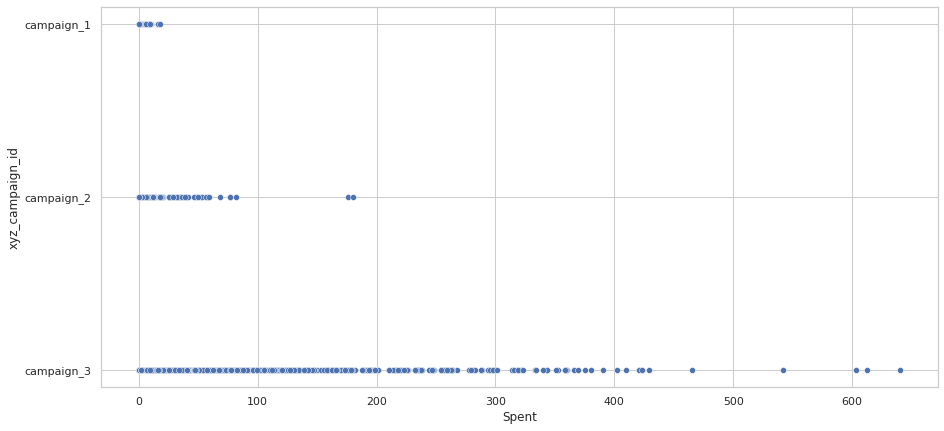

In [59]:
fig=plt.figure(figsize=(15,7))

sns.scatterplot(x='Spent', y='xyz_campaign_id', data=df)


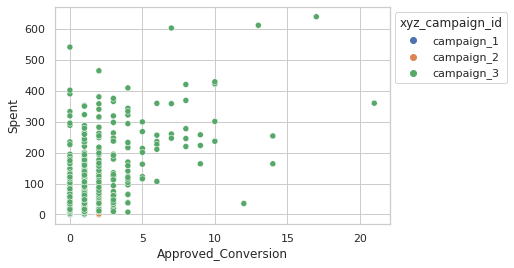

In [60]:
ax=sns.scatterplot(x='Approved_Conversion',y='Spent', hue='xyz_campaign_id', data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# spent is higher for approved conversion ranging from 5 to upwards 

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

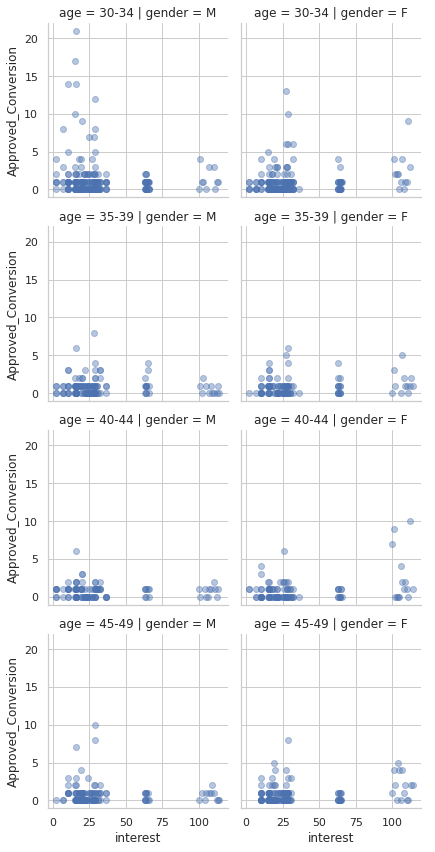

In [61]:
f = sns.FacetGrid(df, col="gender", row='age')
f.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
f.add_legend();

High rate of conversion for Men in lowest age bracket.The conversions are most in 30-34 bracket and then in 45-49 age bracket.
Females conversions high for ads with code greater than 66

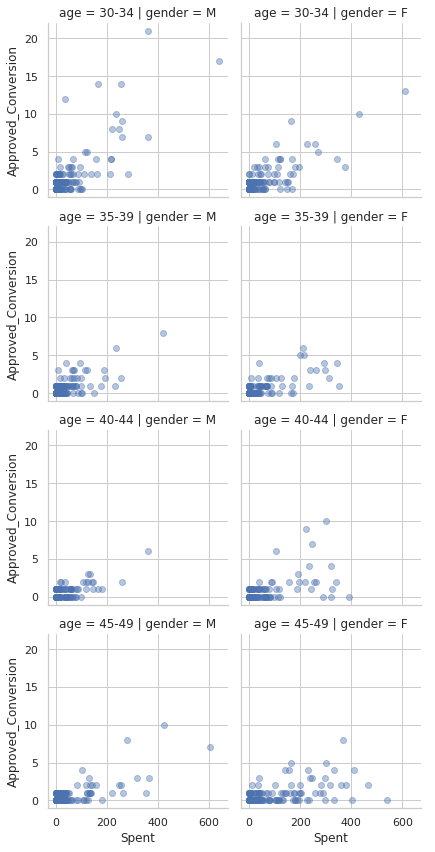

In [62]:
f = sns.FacetGrid(df, col="gender", row='age')
f.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
f.add_legend();

* Females have higher spending
* Males have higher conversions even with lower spending in age group 30-34 specially.
* Higher age bracket has higher spending

Conversion rate per ad, per campaign 

In [63]:
(df['Approved_Conversion'].groupby(by=df['xyz_campaign_id']).sum()/df['ad_id'].groupby(by=df['xyz_campaign_id']).count())*100

xyz_campaign_id
campaign_1     44.444444
campaign_2     39.439655
campaign_3    139.520000
dtype: float64

In [64]:
df['ad_id'].groupby(by=df['xyz_campaign_id']).count()

xyz_campaign_id
campaign_1     54
campaign_2    464
campaign_3    625
Name: ad_id, dtype: int64

conversion rate per campaign distributed by gender

In [65]:
(df['Approved_Conversion'].groupby([df['xyz_campaign_id'],df['gender']]).sum()/df['ad_id'].groupby(by=df['xyz_campaign_id']).count())*100

xyz_campaign_id  gender
campaign_1       F         14.814815
                 M         29.629630
campaign_2       F         20.689655
                 M         18.750000
campaign_3       F         62.560000
                 M         76.960000
dtype: float64

In [66]:
(df['Clicks'].groupby(by=df['xyz_campaign_id']).sum()/df['ad_id'].groupby(by=df['xyz_campaign_id']).count())*100

xyz_campaign_id
campaign_1     209.259259
campaign_2     427.586207
campaign_3    5770.880000
dtype: float64

Cost to conversion OR cost of acquisition for the ads in each campaign


In [67]:
df['Spent'].groupby(by=df['xyz_campaign_id']).sum()/df['Approved_Conversion'].groupby(by=df['xyz_campaign_id']).sum()

xyz_campaign_id
campaign_1     6.237917
campaign_2    15.810765
campaign_3    63.832741
dtype: float64

Between campaign_1 and campaign_2 the cost of conversion is lesser for campaign_1 while its conversion rate is higher. It is performing better than campaign_2. campaign_3 performs best in terms of conversions but cost highest also

Measuring the impact of each advertisement based on the conversion and cost 

In [68]:
impact=df['Spent'].groupby(df['ad_id']).sum()/df['Approved_Conversion'].groupby(df['ad_id']).sum()

In [69]:
impact

ad_id
708746       1.430000
708749            inf
708771            NaN
708815            inf
708818       1.290000
              ...    
1314410    179.094999
1314411           inf
1314412           inf
1314414     99.355000
1314415     82.804999
Length: 1143, dtype: float64

In [70]:
df_2= df[['ad_id','xyz_campaign_id','Impressions','Spent','Approved_Conversion']]


In [71]:
df_2.head()

,ad_id,xyz_campaign_id,Impressions,Spent,Approved_Conversion
0,708746,campaign_1,7350,1.43,1
1,708749,campaign_1,17861,1.82,0
2,708771,campaign_1,693,0.00,0
3,708815,campaign_1,4259,1.25,0
4,708818,campaign_1,4133,1.29,1


In [72]:
df_2.set_index(['ad_id'], inplace=True)

In [73]:
impact.rename('cost_ratio', inplace=True)

ad_id
708746       1.430000
708749            inf
708771            NaN
708815            inf
708818       1.290000
              ...    
1314410    179.094999
1314411           inf
1314412           inf
1314414     99.355000
1314415     82.804999
Name: cost_ratio, Length: 1143, dtype: float64

In [74]:
impact.index

Int64Index([ 708746,  708749,  708771,  708815,  708818,  708820,  708889,
             708895,  708953,  708958,
            ...
            1314405, 1314406, 1314407, 1314408, 1314409, 1314410, 1314411,
            1314412, 1314414, 1314415],
           dtype='int64', name='ad_id', length=1143)

In [75]:
#df_new= df_2.join(impact)
df_new=df_2.merge( impact,left_index=True, right_index=True)

In [76]:
df_new.replace(np.inf,np.nan,inplace=True)

In [77]:
df_new.head()

,xyz_campaign_id,Impressions,Spent,Approved_Conversion,cost_ratio
ad_id,,,,,
708746,campaign_1,7350,1.43,1,1.43
708749,campaign_1,17861,1.82,0,NaN
708771,campaign_1,693,0.00,0,NaN
708815,campaign_1,4259,1.25,0,NaN
708818,campaign_1,4133,1.29,1,1.29


In [78]:
df_3=df_new.dropna(axis=0)

In [79]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 708746 to 1314415
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   xyz_campaign_id      584 non-null    object 
 1   Impressions          584 non-null    int64  
 2   Spent                584 non-null    float64
 3   Approved_Conversion  584 non-null    int64  
 4   cost_ratio           584 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 27.4+ KB


In [80]:
df_3.sort_values(['Approved_Conversion','cost_ratio']).tail(10)

,xyz_campaign_id,Impressions,Spent,Approved_Conversion,cost_ratio
ad_id,,,,,
1121098,campaign_3,1267550,236.769999,10,23.677000
1314398,campaign_3,1137635,301.049999,10,30.105000
1121677,campaign_3,1391924,422.840004,10,42.284000
1121824,campaign_3,1705246,429.479998,10,42.948000
1121206,campaign_3,227925,35.310000,12,2.942500
1121814,campaign_3,2223278,612.300003,13,47.100000
1121108,campaign_3,984521,163.899997,14,11.707143
1121091,campaign_3,1194718,254.049996,14,18.146428
1121100,campaign_3,3052003,639.949998,17,37.644118


* Exploring the dimensions:
Age: More people in the yougest age bracket 30-34
Gender: More Males in the population

INSIGHTS:

* Correlation:
1. Higher Ad impressions drive higher conversions ( Total and Approved) 
2. Higher impressions drive up the cost/spend amount. So those ads should be identified where the cost to acquisition ratio is high.
3. Number of clicks do not impact the conversions much.
4. Distribution of gender across campaigns not same.

* Though Males convert more that Females on overall level, campaign 2 has more Females converting
* Maximum users in 30-34 followed by 45-49 age group.
* Though age wise user ditribution is same across campaigns, campaign 1 has users that convert best in the 40-44 age bracket. probably the ads included in this campaign appeal to that age group more. In the other two campaigns the trend is same and opposite to that of campaign_1.
* Though there are more add campaigns with interest code ranging between 2-66 , there are still many conversions for ads with interest code beyond 66 code. When we compare the xyz campaign_3 with other two campaigns, we can see that campaign_3 has many adds with interests beyond code 66 and perhaps that is what is driving the higher conversions as well.
* Percentage ad impression for each interest: For interest code 16 it is dispproportinately high. Interest code 29 has 8 % impressions but 
* delivers 12 % conversions. The impressions should be increased for other ads with interest code that are giving high conversions. 
* Redistribute the impressions based on the conversions.
* High rate of conversion for Men in lowest age bracket.The conversions are most in 30-34 bracket and then in 45-49 age bracket. Females conversions high for ads with code greater than 66.
* Females have higher spending
* Males have higher conversions even with lower spending in age group 30-34 specially.
* Higher age bracket has higher spending.

RECOMMENDATIONS:
* **Between campaign_1 and campaign_2 the cost of conversion is lesser for campaign_1 while its conversion rate is higher. It is performing better than campaign_2. 
campaign_3 performs best in terms of conversions but cost highest also.****
* Females should be targetted with ads in the range above 100. They have better conversion rate for those ads

* Young men convert more so they should be targetted more
* Ads with high cost to acquisition ratio should be dropped or their impressions should be reduced and replaced with ads with higher conversion rate and lower cost ratio
* Campaign 1 should be given more ads as it has lower cost to acquisition ratio.







Modelling -future prediction 

In [81]:
# renaming the campaigns for analysis purpose
df['xyz_campaign_id'].replace({'campaign_1':916,'campaign_2':936,'campaign_3':1178}, inplace=True)


In [82]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [83]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse=False, handle_unknown="error", drop='first')

onehotencoder_df = pd.DataFrame(onehotencoder.fit_transform(df[['gender']]), columns=['gender_1'])

onehotencoder_df.head()



,gender_1
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [84]:
df=df.join(onehotencoder_df)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_1
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1.0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1.0


In [85]:
onehotencoder_df = pd.DataFrame(onehotencoder.fit_transform(df[['age']]), columns=['age_1','age_2','age_3'])

onehotencoder_df.head()


,age_1,age_2,age_3
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [86]:
df=df.join(onehotencoder_df)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_1,age_1,age_2,age_3
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1.0,0.0,0.0,0.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1.0,0.0,0.0,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1.0,0.0,0.0,0.0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1.0,0.0,0.0,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1.0,0.0,0.0,0.0


In [87]:
df_2=df.copy()
df_2.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_1,age_1,age_2,age_3
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1.0,0.0,0.0,0.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1.0,0.0,0.0,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1.0,0.0,0.0,0.0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1.0,0.0,0.0,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1.0,0.0,0.0,0.0


In [88]:
df_2=df_2.drop(columns=['age','gender'])

In [89]:
df_2.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_1,age_1,age_2,age_3
0,708746,916,103916,15,7350,1,1.43,2,1,1.0,0.0,0.0,0.0
1,708749,916,103917,16,17861,2,1.82,2,0,1.0,0.0,0.0,0.0
2,708771,916,103920,20,693,0,0.00,1,0,1.0,0.0,0.0,0.0
3,708815,916,103928,28,4259,1,1.25,1,0,1.0,0.0,0.0,0.0
4,708818,916,103928,28,4133,1,1.29,1,1,1.0,0.0,0.0,0.0


In [90]:
df_2=df_2[['ad_id', 'interest','Impressions','Clicks','Spent','Approved_Conversion','gender_1','age_1','age_2','age_3']]

In [91]:
df_2.head()

,ad_id,interest,Impressions,Clicks,Spent,Approved_Conversion,gender_1,age_1,age_2,age_3
0,708746,15,7350,1,1.43,1,1.0,0.0,0.0,0.0
1,708749,16,17861,2,1.82,0,1.0,0.0,0.0,0.0
2,708771,20,693,0,0.00,0,1.0,0.0,0.0,0.0
3,708815,28,4259,1,1.25,0,1.0,0.0,0.0,0.0
4,708818,28,4133,1,1.29,1,1.0,0.0,0.0,0.0


In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia=[]
k=np.arange(1,9)

for i in k:
    model=KMeans(n_clusters= i, max_iter=5)
    km = model.fit(df_2.values)
    inertia.append(pd.Series({'k': i,
                              'inertia': model.inertia_
                             }))

In [93]:
inertias= pd.concat(inertia, axis=1).T.set_index('k')

In [94]:
inertias

,inertia
k,
1.0,1.546878e+14
2.0,7.179832e+13
3.0,3.322774e+13
4.0,2.208926e+13
5.0,1.515302e+13
6.0,1.220321e+13
7.0,9.411915e+12
8.0,7.739360e+12


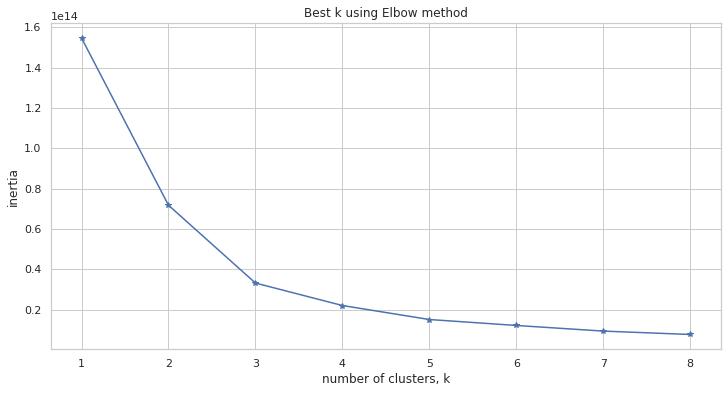

In [95]:
# Plot k vs inertias

plt.figure(figsize=(12,6))
plt.plot(inertias.index, inertias['inertia'], '-*')
plt.title('Best k using Elbow method')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k)
plt.show()

There is a sharp drop in the inertia from cluster 1 to cluster 2 and further till cluster 3. We can choose # of clusters as 2 or 3


In [96]:
sc=[]
k= np.arange(2,9)
for i in k:
    model = KMeans(n_clusters= i, max_iter=5)
    pred = model.fit_predict(df_2.values)
    sil_score= silhouette_score(df_2.values, pred)
    sc.append(pd.Series({'k': i,
                            'sc': sil_score
                             }))

In [97]:
score=pd.concat(sc, axis=1).T.set_index('k')
score

,sc
k,
2.0,0.638055
3.0,0.641908
4.0,0.640442
5.0,0.641797
6.0,0.613237
7.0,0.623550
8.0,0.663310


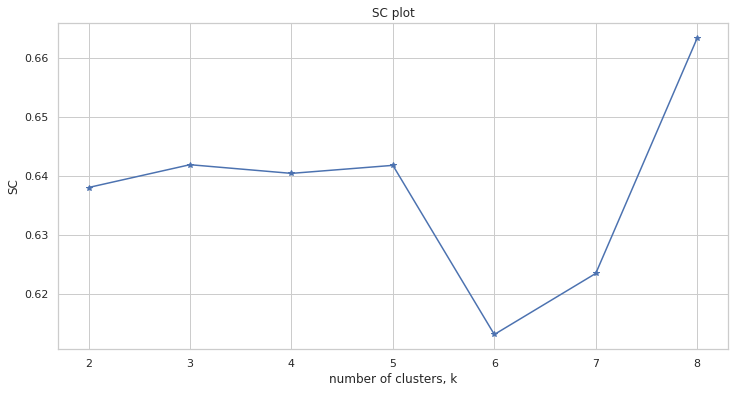

In [98]:
# Plot k vs inertias

plt.figure(figsize=(12,6))
plt.plot(score.index, score['sc'], '-*')
plt.title('SC plot')
plt.xlabel('number of clusters, k')
plt.ylabel('SC')
plt.xticks(k)
plt.show()

3 clusters seems ok but we have maximum silhoutte score at 8 clusters. We will go ahead with 3 as of now.


In [99]:
model = KMeans(n_clusters= 3, max_iter=5)
model.fit(df_2.values)

KMeans(max_iter=5, n_clusters=3)

In [100]:
df_2['Score']= model.predict(df_2.values)
#data.sample(5)
df_2

,ad_id,interest,Impressions,Clicks,Spent,Approved_Conversion,gender_1,age_1,age_2,age_3,Score
0,708746,15,7350,1,1.430000,1,1.0,0.0,0.0,0.0,2
1,708749,16,17861,2,1.820000,0,1.0,0.0,0.0,0.0,2
2,708771,20,693,0,0.000000,0,1.0,0.0,0.0,0.0,2
3,708815,28,4259,1,1.250000,0,1.0,0.0,0.0,0.0,2
4,708818,28,4133,1,1.290000,1,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,109,1129773,252,358.189997,2,0.0,0.0,0.0,1.0,1
1139,1314411,110,637549,120,173.880003,0,0.0,0.0,0.0,1.0,1
1140,1314412,111,151531,28,40.289999,0,0.0,0.0,0.0,1.0,0
1141,1314414,113,790253,135,198.710001,2,0.0,0.0,0.0,1.0,1


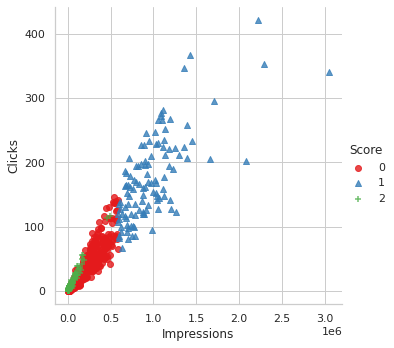

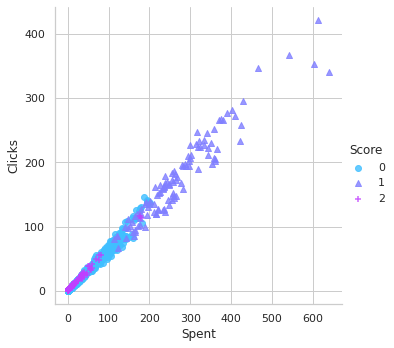

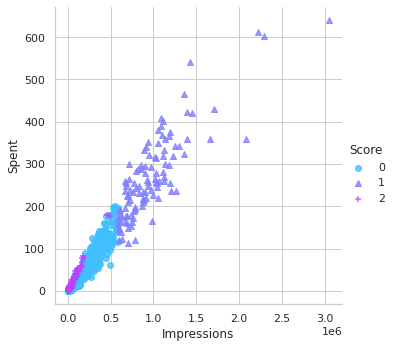

In [101]:
sns.lmplot(x='Impressions', y='Clicks', data= df_2, hue='Score',fit_reg=False, markers=["o", "^", "+"] ,palette='Set1')
sns.lmplot(x='Spent', y='Clicks', data= df_2, hue='Score',fit_reg=False, markers=["o", "^", "+"], palette="cool" )
sns.lmplot(x='Impressions', y='Spent', data= df_2, hue='Score',fit_reg=False, markers=["o", "^", "+"] ,palette="cool" )
plt.show()

In [102]:
print('number of ads :' , df_2.groupby('Score')['ad_id'].count())
print('breakup of conversions :' , df_2.groupby('Score')['Approved_Conversion'].sum())
print('breakup of Impressions :',  df_2.groupby('Score')['Impressions'].sum())
print('breakup of Spent :',  df_2.groupby('Score')['Spent'].sum())

number of ads : Score
0    514
1    111
2    518
Name: ad_id, dtype: int64
breakup of conversions : Score
0    449
1    423
2    207
Name: Approved_Conversion, dtype: int64
breakup of Impressions : Score
0     96258881
1    108564835
2      8611112
Name: Impressions, dtype: int64
breakup of Spent : Score
0    25723.970000
1    29938.179959
2     3043.080000
Name: Spent, dtype: float64


In [103]:
print("avg_conv_cluster1=", (431/114))
print("avg_conv_cluster2=", (441/511))
print("avg_conv_cluster3=", (207/518))
print("avg cost to acq_cluster1=", (30415.159958/431))
print("avg cost to acq_cluster2=", (25246.990001/441))
print("avg cost to acq_cluster3=", (3043.080000/207))


avg_conv_cluster1= 3.780701754385965
avg_conv_cluster2= 0.863013698630137
avg_conv_cluster3= 0.3996138996138996
avg cost to acq_cluster1= 70.56881660788864
avg cost to acq_cluster2= 57.249410433106576
avg cost to acq_cluster3= 14.70086956521739


In [104]:
df_cluster1=df_2[df_2['Score']==0]
df_cluster2=df_2[df_2['Score']==1]
df_cluster3=df_2[df_2['Score']==2]

In [105]:
cluster1=pd.merge(df_cluster1,df[["ad_id","gender","age"]],on="ad_id")
cluster2=pd.merge(df_cluster2,df[["ad_id","gender","age"]],on="ad_id")
cluster3=pd.merge(df_cluster3,df[["ad_id","gender","age"]],on="ad_id")


In [106]:
cluster1.groupby('gender')["ad_id"].count()

gender
F    203
M    311
Name: ad_id, dtype: int64

In [107]:
cluster2.groupby('gender')["ad_id"].count()

gender
F    73
M    38
Name: ad_id, dtype: int64

In [108]:
cluster3.groupby('gender')["ad_id"].count()

gender
F    275
M    243
Name: ad_id, dtype: int64

In [109]:
cluster1.groupby('interest')["ad_id"].count()

interest
2      18
7      13
10     24
15     15
16     15
18     13
19     22
20     22
21     22
22     21
23     17
24     16
25     17
26     16
27     15
28     19
29     24
30     16
31     15
32     19
36     13
63     22
64     24
65     11
66     11
100     4
101     4
102     7
103     4
104     5
105     5
106     4
107     4
108     6
109     4
110     7
111     5
112     5
113     5
114     5
Name: ad_id, dtype: int64

In [110]:
cluster2.groupby('interest')["ad_id"].count()

interest
7       1
10     11
15      5
16     23
18      7
19      1
20      2
22      1
25      2
26      2
27     11
28      7
29     11
32      2
63      4
100     2
101     3
103     1
105     2
106     1
107     4
108     1
109     2
110     1
111     1
112     2
113     1
Name: ad_id, dtype: int64

In [111]:
cluster3.groupby('interest')["ad_id"].count()

interest
2       7
7      10
10     50
15     31
16    102
18     23
19      9
20     25
21     14
22     11
23      6
24      8
25      7
26     23
27     34
28     25
29     42
30      9
31     10
32     12
36      8
63     20
64     24
65      8
Name: ad_id, dtype: int64

In [112]:
# unique number of campaigns that have no conversion
df[df['Approved_Conversion']==0]['ad_id'].nunique()

559

In [113]:
cluster1[cluster1['Approved_Conversion']==0]['ad_id'].nunique()

224

In [114]:
cluster2[cluster2['Approved_Conversion']==0]['ad_id'].nunique()

13

In [115]:
cluster3[cluster3['Approved_Conversion']==0]['ad_id'].nunique()

322